In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

def comparator(input_data):
    output_data = np.zeros(len(input_data))

    rising = True
    previous_x = 0
    for n, x in enumerate(input_data):
        if rising == True and x < previous_x:
            rising = False
        elif rising == False and x > previous_x:
            rising = True

        output_data[n] = 1 if rising else -1
        previous_x = x
    return output_data

def clock_divider(input_data):
    output_data = np.zeros(len(input_data))

    rising = True
    previous_x = 0
    output = 1
    switch_count = 0
    for n, x in enumerate(input_data):
        output_data[n] = output

        if rising == True and x < previous_x:
            switch_count += 1
            rising = False
        elif rising == False and x > previous_x:
            switch_count += 1
            rising = True
        
        if switch_count == 2:
            output = 1 if output == -1 else -1
            switch_count = 0

        previous_x = x
    return output_data

In [2]:
N = 256
fs = 48000
freq = 2000

x = np.sin(2 * np.pi * freq / fs * np.arange(N)) * 0.5
y1 = comparator(x)
y2 = clock_divider(y1)

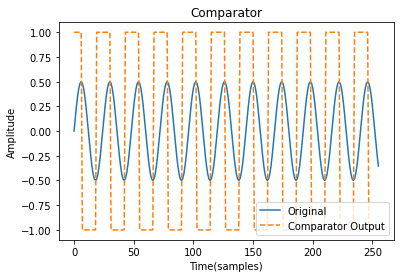

In [21]:
plt.plot(x, label='Original')
plt.plot(y1, '--', label='Comparator Output')
plt.title('Comparator')
plt.xlabel('Time(samples)')
plt.ylabel('Amplitude')
plt.legend(loc='lower right')
plt.show()

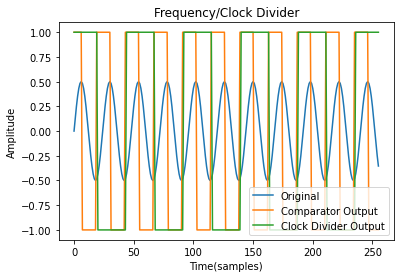

In [27]:
plt.plot(x, label='Original')
plt.plot(y1, label='Comparator Output')
plt.plot(y2, label='Clock Divider Output')
plt.title('Frequency/Clock Divider')
plt.xlabel('Time(samples)')
plt.ylabel('Amplitude')
plt.legend(loc='lower right')
plt.show()